# Guided Project: Analyzing movie reviews
## 1: Movie Reviews
The dataset is stored in the *fandango_score_comparison.csv* file. It contains information on how major movie review services rated movies. The data originally came from [FiveThirtyEight](http://fivethirtyeight.com/features/fandango-movies-ratings/).

Here are the first few rows of the data, in CSV format:

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv("F:\\YandexDisk\\ML\\Dataquest\\fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Each row represents a single movie. Each column contains information about how the online movie review services [RottenTomatoes](https://www.rottentomatoes.com/), [Metacritic](http://www.metacritic.com/), [IMDB](http://www.imdb.com/), and [Fandango](http://www.fandango.com/) rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

- RottenTomatoes -- 0-100, in increments of 1.
- Metacritic -- 0-100, in increments of 1.
- IMDB -- 0-10, in increments of .1.
- Fandango -- 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

- FILM -- the name of the movie.
- RottenTomatoes -- the RottenTomatoes (RT) critic score.
- RottenTomatoes_User -- the RT user score.
- Metacritic -- the Metacritic critic score.
- Metacritic_User -- the Metacritic user score.
- IMDB -- the IMDB score given to the movie.
- Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

## 2: Histograms
Now that you've read the dataset in, you can do some statistical exploration of the ratings columns. We'll primarily focus on the Metacritic_norm_round and the Fandango_Stars columns, which will let you see how Fandango and Metacritic differ in terms of review scores.

<function matplotlib.pyplot.show>

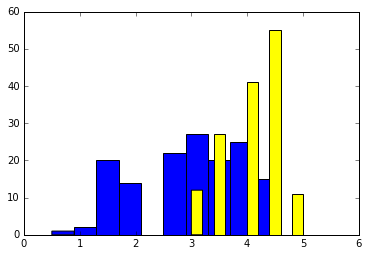

In [48]:
plt.hist(movies["Metacritic_norm_round"])

plt.hist(movies["Fandango_Stars"], color="yellow")
plt.show

Now we see that Metacritic reviews look like normal distribution and Fandago have really different distribution. Is seems like Fandago have biased reviews. Let's figure it out.

## 3: Mean, Median, And Standard Deviation
Let's apply mean, median, and standard deviation metrics to the Fandango_Stars and Metacritic_norm_round columns to figure out how different they are.

In [49]:
movies["Fandango_Stars"].mean() # mean Fandago

4.089041095890411

In [50]:
movies["Metacritic_norm_round"].mean() # mean Metacritic

2.9726027397260273

In [51]:
np.std(movies["Fandango_Stars"]) # standard deviation of Fandago

0.5385321612699531

In [52]:
np.std(movies["Metacritic_norm_round"]) # standard deviation of Metacritic

0.9875610297038636

## 4: Scatter Plots
We know the ratings tend to differ, but we don't know which movies tend to be the largest outliers. You can find this by making a scatterplot, then looking at which movies are far away from the others.

You can also subtract the Fandango_Stars column from the Metacritic_norm_round column, take the absolute value, and sort movies based on the difference to find the movies with the largest differences between their Metacritic and Fandango ratings.

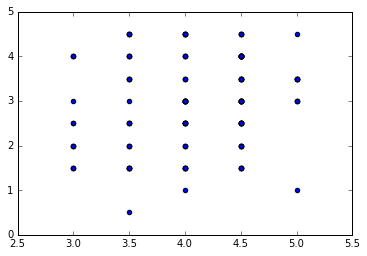

In [53]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.

In [54]:
movies["fm_diff"] = np.abs(movies["Fandango_Stars"] - movies["Metacritic_norm_round"])
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## 5: Correlations
Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

You can then create a linear regression to see what the predicted Fandango score would be based on the Metacritic score.

In [55]:
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r_value

0.17844919073895918

The correlation is actually fairly low.

In [59]:
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
slope

0.097311077973928503

Predict what a movie that got a 3.0 in Metacritic would get on Fandango using the line.

In [60]:
pred = 3 * slope + intercept
pred

4.0917071528212032

## 6: Finding Residuals
In the last screen, you created a linear regression for relating Metacritic_norm_round to Fandango_Stars. You can create a residual plot to better visualize how the line relates to the existing datapoints. This can help you see if two variables are linearly related or not.

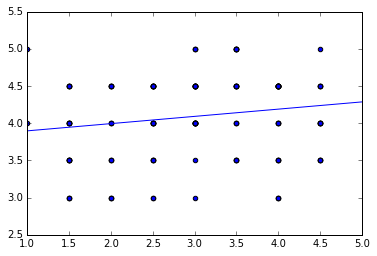

In [62]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()